In this weekly challenge, we’ll be exploring data on H2 visa applications, which are requests by
companies to hire foreign workers for non-agricultural jobs within the United States. The U.S.
Department of Labor releases this data as Excel (.XLS) files and BuzzFeed News has been
tracking and hosting these datasets on Github. The dataset we’ll be working with represents H2
applications from October 1, 2010 to March 31, 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
visa = pd.read_csv("H-2-certification-decisions.csv")

C:\Users\Keerthana\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,8,9,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
visa.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40,40,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
visa.columns

Index([u'case_no', u'visa_type', u'fy', u'last_event_date', u'case_status',
       u'n_requested', u'n_certified', u'is_certified',
       u'certification_begin_date', u'certification_end_date', u'job_title',
       u'employer_name', u'employer_state', u'employer_city',
       u'employer_address_1', u'employer_address_2', u'employer_postal_code',
       u'worksite_state', u'worksite_city', u'agent_name',
       u'organization_flag', u'is_duplicate'],
      dtype='object')

In [5]:
visa.dtypes

case_no                      object
visa_type                    object
fy                            int64
last_event_date              object
case_status                  object
n_requested                 float64
n_certified                   int64
is_certified                   bool
certification_begin_date     object
certification_end_date       object
job_title                    object
employer_name                object
employer_state               object
employer_city                object
employer_address_1           object
employer_address_2           object
employer_postal_code         object
worksite_state               object
worksite_city                object
agent_name                   object
organization_flag            object
is_duplicate                 object
dtype: object

### The fields in the standardized data are as follows:

Source - https://github.com/BuzzFeedNews/H-2-certification-data#standardized-data

case_no: The OFLC-assigned case number.

visa_type: "H-2A" or "H-2B".

fy: The fiscal year of the most recent OFLC decision/progress on the case.

last_event_date: The date of the most recent OFLC decision/progress on the case.

case_status: The status of the case; typically a variation on "CERTIFIED", "DENIED", "WITHDRAWN", et cetera.

n_requested: The number of workers/visas requested.

n_certified: The number of workers/visas certified.

is_certified: True/False; a standardization of the case_status field.

certification_begin_date / certification_begin_date: "Actual date granted to an employer indicating when the need for the foreign workers to perform agricultural services or labor is expected to [begin / end]." Unavailable for H-2B data prior to FY2007.

job_title: The job title listed by the employer.

employer_name: The name of the employer applying for certification; converted to all-caps.

employer_state: The state the employer listed.

employer_city: The city the employer listed.

employer_address_1: The first line of the address the employer listed.

employer_address_2: The second line of the address the employer listed.

employer_postal_code: The postal code the employer listed.

agent_name: The name of the agent or attorney filing the application for the employer. Some years of data include multiple columns related to visa agents; the standardized field combines these fields, separating them by a :.

organization_flag: Various types of organizations — including sole employers and joint employers — can apply for visa
certifications. This field tracks OFLC's categorizations. Only available for H-2A decisions.

is_duplicate: True/False/null: This derived value will be True — indicating that this row corresponds a sub-application of a joint employer's "master application" — if (a) visa_type is "H-2A", (b) the organization_flag is blank, and (c) comes from fiscal year 2008 or later. H-2A data from FY 2006 and FY 2007 do not contain a organization_flag field. For these records, and H-2B records, is_duplicate will be null.

In [6]:
visa["visa_type"].value_counts()

H-2B    122662
H-2A     90493
Name: visa_type, dtype: int64

There are two different VISA types

In [7]:
visa["case_status"].value_counts()

CERTIFIED - FULL                                        57044
CERTIFIED                                               42671
CERTIFIED, TEMPORARY                                    36788
DETERMINATION ISSUED - CERTIFICATION                    18977
CERTIFICATION                                           17195
DENIED                                                  13684
PARTIAL CERTIFIED                                        8514
DENIED, TEMPORARY                                        5817
WITHDRAWN                                                3189
CERTIFIED - PARTIAL                                      3120
PARTIAL CERTIFICATION                                    2089
RECEIVED REGIONAL OFFICE                                  980
DETERMINATION ISSUED - CERTIFICATION EXPIRED              954
DETERMINATION ISSUED - DENIED                             366
CERTIFICATION EXPIRED                                     355
DETERMINATION ISSUED - WITHDRAWN                          346
INCOMPLE

In [8]:
status_map = {
"CERTIFIED - FULL" : "C-F",
"CERTIFIED" : "C",
"CERTIFIED, TEMPORARY" : "CT",
"DETERMINATION ISSUED - CERTIFICATION" : "DIC",
"CERTIFICATION":"CN",
"DENIED":"D",
"PARTIAL CERTIFIED" : "PC",
"DENIED, TEMPORARY" : "DT",
"WITHDRAWN" : "W",
"CERTIFIED - PARTIAL" : "C-P",
"PARTIAL CERTIFICATION" : "PCN",
"RECEIVED REGIONAL OFFICE" : "RRO",
"DETERMINATION ISSUED - CERTIFICATION EXPIRED" : "DI-CE",
"DETERMINATION ISSUED - DENIED" : "DI-D",
"CERTIFICATION EXPIRED" : "CE",
"DETERMINATION ISSUED - WITHDRAWN" : "DI-W",
"INCOMPLETE" : "I",
"DETERMINATION ISSUED - PARTIAL CERTIFICATION" : "DI-PC",
"RECEIVED": "R",
"PARTIAL CERTIFICATION EXPIRED":"PCE",
"REMAND TO SWA" : "RSWA",
"REMAND ISSUED TO EMPLOYER":"RIE",
"MODIFICATION":"M",
"DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED" : "DI-PCE",
"REMAND ISSUED TO STATE":"RIS",
"REDUCTION IN RECRUITMENT DENIED": "RIRD",
"FINAL REVIEW" : "FR",
"DATA REVIEW" : "DR",
"RETURNED BY EMP AFTER REMAND" : "RER",
"NOF ISSUED": "NI"
}

In [9]:
visa["case_status_modified"] = visa["case_status"].map(status_map)

In [10]:
visa.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,case_status_modified
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1,0,False,NaN,NaN,...,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DT
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CT
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CT
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5,5,True,NaN,NaN,...,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CT
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40,40,True,NaN,NaN,...,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CT


Changing the last_event_date column from object datatype to datetime format

In [11]:
visa["last_event_date"] = pd.to_datetime(visa["last_event_date"])

In [12]:
visa.dtypes

case_no                             object
visa_type                           object
fy                                   int64
last_event_date             datetime64[ns]
case_status                         object
n_requested                        float64
n_certified                          int64
is_certified                          bool
certification_begin_date            object
certification_end_date              object
job_title                           object
employer_name                       object
employer_state                      object
employer_city                       object
employer_address_1                  object
employer_address_2                  object
employer_postal_code                object
worksite_state                      object
worksite_city                       object
agent_name                          object
organization_flag                   object
is_duplicate                        object
case_status_modified                object
dtype: obje

Checking the distribution of n_requested column

In [13]:
visa["n_requested"].describe()

count    141512.000000
mean         18.916516
std          42.546266
min           0.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        1866.000000
Name: n_requested, dtype: float64

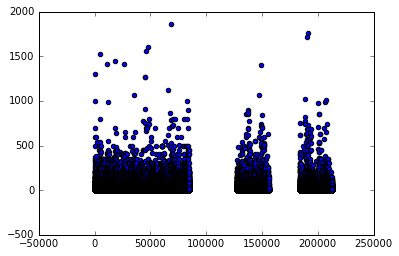

In [14]:
plt.scatter(x=visa.index,y=visa["n_requested"])


In [15]:
# clearly there are two sets of missing values around the index ~ 100000

# most values range from 0 to 500 and very few beyond that

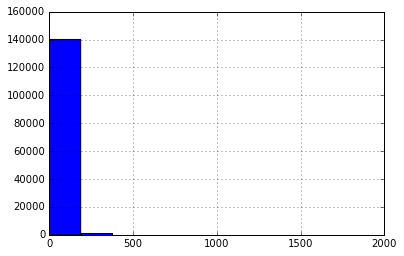

In [16]:
visa["n_requested"].hist()

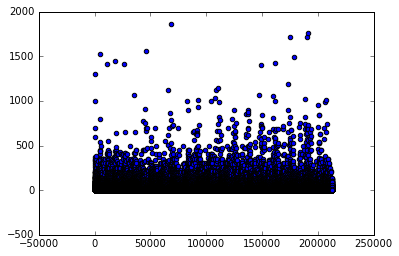

In [17]:
plt.scatter(x=visa.index,y=visa["n_certified"])

In [18]:
# the values are much more consistent and there are no breaks in values

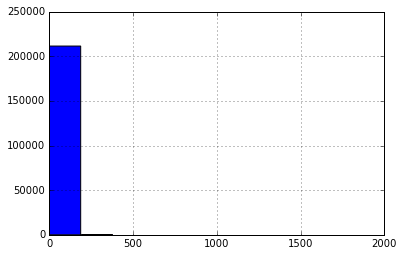

In [19]:
y=visa["n_certified"].hist()

In [20]:
# again, a big percentage of the values range from 0-500 and very few values beyond that

In [21]:
visa["job_title"].value_counts()

LABORER, LANDSCAPE                                    24595
CLEANER, HOUSEKEEPING                                  6563
FARMWORKERS AND LABORERS, CROP                         5354
FARMWORKER; DIVERSIFIED CROP                           5273
SHEEPHERDER                                            5258
LANDSCAPE LABORER                                      4942
STABLE ATTENDANT                                       4198
FARMWORKER, DIVERSIFIED CROP                           2978
FARMWORKER                                             2965
KITCHEN HELPER                                         2919
SHEEP HERDER                                           2894
CONSTRUCTION WORKER I                                  2651
CONSTRUCTION WORKER II                                 2472
GROUNDSKEEPER, INDUSTRIAL COMMERCIAL                   2457
FARM WORKERS & LABORERS, CROP                          2227
COOK                                                   2213
FARM WORKER; DIVERSIFIED CROPS II       

In [22]:
len(visa["job_title"].value_counts())

8752

In [23]:
# there are 8752 different job titles in the dataset

In [24]:
visa["organization_flag"].value_counts()

S                                            25085
Individual Employer                          14143
Association - Filing as Agent (H-2A Only)     3900
H-2A Labor Contractor or Job Contractor       2073
J                                              883
Association - Joint Employer (H-2A Only)       463
A                                              354
M                                              202
Association - Sole Employer (H-2A Only)         19
Name: organization_flag, dtype: int64

In [25]:
visa.columns

Index([u'case_no', u'visa_type', u'fy', u'last_event_date', u'case_status',
       u'n_requested', u'n_certified', u'is_certified',
       u'certification_begin_date', u'certification_end_date', u'job_title',
       u'employer_name', u'employer_state', u'employer_city',
       u'employer_address_1', u'employer_address_2', u'employer_postal_code',
       u'worksite_state', u'worksite_city', u'agent_name',
       u'organization_flag', u'is_duplicate', u'case_status_modified'],
      dtype='object')

In [26]:
total_rows = visa.shape[0]

Trying to see how many columns have null values and their percentages compared to the total rows in a column

In [27]:
null_row_dict = {}
for col in list(visa.columns):
    length = len(visa[visa[col].isnull()])
    null_row_dict[col] = length

In [28]:
pd.Series(null_row_dict).sort_values()

case_no                          0
case_status                      0
case_status_modified             0
visa_type                        0
n_certified                      0
fy                               0
is_certified                     0
employer_name                   22
employer_city                   79
employer_state                 126
job_title                      484
last_event_date               7469
employer_address_1           43950
employer_postal_code         44276
agent_name                   57221
certification_begin_date     57804
certification_end_date       57813
worksite_state               63071
n_requested                  71643
worksite_city               131175
is_duplicate                137871
organization_flag           166033
employer_address_2          191559
dtype: int64

In [29]:
# A better way to look at the summary of the dataframe

import pandas_profiling

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [30]:
pandas_profiling.ProfileReport(visa)

Number of variables,23
Number of observations,213155
Total Missing (%),21.0%
Total size in memory,37.6 MiB
Average record size in memory,185.0 B
Numeric,4
Categorical,18
Date,1
Text (Unique),0
Rejected,0
Distinct count,14061


In [32]:
print(len(visa.drop_duplicates()))
print(total_rows)

213129
213155


In [33]:
# removing duplicate rows in the dataframe

visa.drop_duplicates(inplace=True)